Importing packages

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import pickle

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Dataset

In [3]:
df = pd.read_csv('data - Copy.csv', usecols = ['password','strength'])
print(df.shape)
df.head()


(669641, 2)


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


{'Weak': 89703, 'Medium': 496801, 'Strong': 83137}


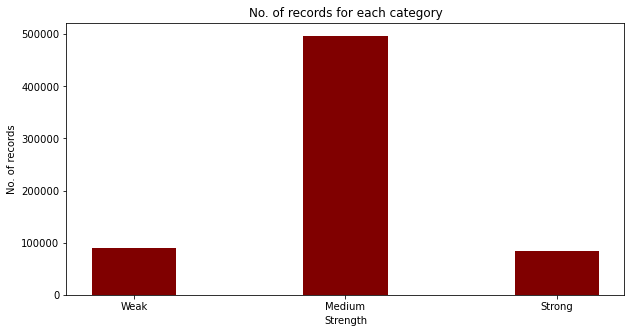

In [4]:
import matplotlib.pyplot as plt
count_dict = {'Weak':0, 'Medium': 0, 'Strong':0}
for i in df['strength'].values:
  if i == 1:
    count_dict['Medium'] += 1
  if i == 2:
    count_dict['Strong'] += 1
  if i == 0:
    count_dict['Weak'] += 1
    
print(count_dict)

keys = list(count_dict.keys())
values = list(count_dict.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(keys, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Strength")
plt.ylabel("No. of records")
plt.title("No. of records for each category")
plt.show()

Pre-processing

In [7]:
def getTokens(inputString): #custom tokenizer. ours tokens are characters rather than full words
	tokens = []
	for i in inputString:
		tokens.append(i)
	return tokens

vectorizer = TfidfVectorizer(tokenizer=getTokens) #vectorizing
X = vectorizer.fit_transform(df['password'].values.astype('U'))
X_train, X_test, y_train, y_test = train_test_split(X, df['strength'], test_size=0.10, random_state=42)  #splitting

sc = StandardScaler(with_mean=False)
X_train_sc = sc.fit(X_train)
X_train = X_train_sc.transform(X_train)
X_test = X_train_sc.transform(X_test)

Decision Tree

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=42, criterion="gini")
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


filename = 'decisiontree__.sav'
pickle.dump(clf, open(filename, 'wb'))

0.9289479578884492


accuracy :  0.9289479578884492
              precision    recall  f1-score   support

           0     0.8606    0.8093    0.8341      8855
           1     0.9479    0.9627    0.9552     49918
           2     0.8797    0.8528    0.8661      8192

    accuracy                         0.9289     66965
   macro avg     0.8961    0.8749    0.8851     66965
weighted avg     0.9280    0.9289    0.9283     66965



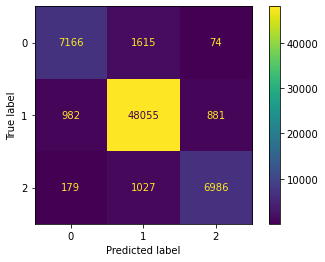

In [17]:
filename = 'decisiontree__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))



from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)


Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( criterion='gini',verbose=10,max_features='sqrt',n_jobs=-1)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

filename = 'randomforest__.sav'
pickle.dump(clf, open(filename, 'wb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.0s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   40.1s


building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.8min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.6min


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.7min


building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  4.3min


building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100building tree 90 of 100

building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  5.0min remaining:   40.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9575748525349063


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s


accuracy :  0.9575748525349063


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0     0.9612    0.8289    0.8902      8855
           1     0.9564    0.9885    0.9722     49918
           2     0.9621    0.9080    0.9342      8192

    accuracy                         0.9576     66965
   macro avg     0.9599    0.9085    0.9322     66965
weighted avg     0.9577    0.9576    0.9567     66965



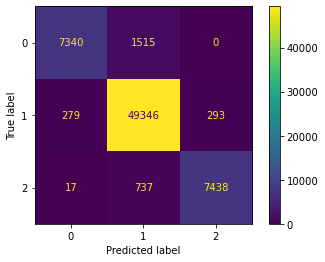

In [18]:
filename = 'randomforest__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)

XGBoost classifier

In [13]:
from xgboost import XGBClassifier
xc = XGBClassifier(verbosity=2, max_depth = 10, n_jobs=-1)
xc2 = xc.fit(X_train, y_train)
print(xc2.score(X_test, y_test))

filename = 'XGBclassifier__.sav'
pickle.dump(xc2, open(filename, 'wb'))

C:\Users\saira\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:04:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 640 extra nodes, 0 pruned nodes, max_depth=10
[06:04:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 766 extra nodes, 0 pruned nodes, max_depth=10
[06:04:42] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 768 extra nodes, 0 pruned nodes, max_depth=10
[06:04:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 674 extra nodes, 0 pruned nodes, max_depth=10
[06:04:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 686 extra nodes, 0 pruned nodes, max_depth=10
[06:04:44] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 784 extra nodes, 0 pruned nodes, max_depth=10
[06:04:45] INFO: ..\src\tree\updater_prune.cc:101: tree p

[06:05:36] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 612 extra nodes, 0 pruned nodes, max_depth=10
[06:05:37] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 760 extra nodes, 0 pruned nodes, max_depth=10
[06:05:38] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 1046 extra nodes, 0 pruned nodes, max_depth=10
[06:05:38] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 702 extra nodes, 0 pruned nodes, max_depth=10
[06:05:39] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 754 extra nodes, 0 pruned nodes, max_depth=10
[06:05:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 1018 extra nodes, 0 pruned nodes, max_depth=10
[06:05:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 680 extra nodes, 0 pruned nodes, max_depth=10
[06:05:42] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 672 extra nodes, 0 pruned nodes, max_depth=10
[06:05:42] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 1020 extr

[06:06:39] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 596 extra nodes, 0 pruned nodes, max_depth=10
[06:06:40] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 674 extra nodes, 0 pruned nodes, max_depth=10
[06:06:41] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 842 extra nodes, 0 pruned nodes, max_depth=10
[06:06:42] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 578 extra nodes, 0 pruned nodes, max_depth=10
[06:06:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 468 extra nodes, 0 pruned nodes, max_depth=10
[06:06:44] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 678 extra nodes, 0 pruned nodes, max_depth=10
[06:06:45] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 724 extra nodes, 0 pruned nodes, max_depth=10
[06:06:45] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 752 extra nodes, 0 pruned nodes, max_depth=10
[06:06:46] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 744 extra n

[06:07:42] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 524 extra nodes, 0 pruned nodes, max_depth=10
[06:07:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 396 extra nodes, 0 pruned nodes, max_depth=10
[06:07:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 606 extra nodes, 0 pruned nodes, max_depth=10
[06:07:44] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 620 extra nodes, 0 pruned nodes, max_depth=10
[06:07:45] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 472 extra nodes, 0 pruned nodes, max_depth=10
[06:07:46] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 696 extra nodes, 0 pruned nodes, max_depth=10
[06:07:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 518 extra nodes, 0 pruned nodes, max_depth=10
[06:07:48] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 362 extra nodes, 0 pruned nodes, max_depth=10
[06:07:49] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 572 extra n

[06:08:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 468 extra nodes, 0 pruned nodes, max_depth=10
[06:08:43] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 378 extra nodes, 0 pruned nodes, max_depth=10
[06:08:44] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 576 extra nodes, 0 pruned nodes, max_depth=10
[06:08:45] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 548 extra nodes, 0 pruned nodes, max_depth=10
[06:08:46] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 282 extra nodes, 0 pruned nodes, max_depth=10
[06:08:47] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 512 extra nodes, 0 pruned nodes, max_depth=10
[06:08:48] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 474 extra nodes, 0 pruned nodes, max_depth=10
[06:08:49] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 266 extra nodes, 0 pruned nodes, max_depth=10
[06:08:50] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 478 extra n

accuracy :  0.9866945419248861
              precision    recall  f1-score   support

           0     0.9790    0.9654    0.9722      8855
           1     0.9883    0.9939    0.9911     49918
           2     0.9849    0.9656    0.9752      8192

    accuracy                         0.9867     66965
   macro avg     0.9841    0.9750    0.9795     66965
weighted avg     0.9867    0.9867    0.9867     66965



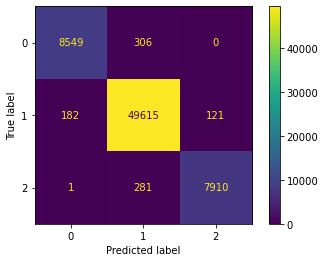

In [19]:
filename = 'XGBclassifier__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)

Light GBM classifier

In [20]:
import lightgbm as lgb

lg= lgb.LGBMClassifier(verbosity=2,num_leaves=500,n_estimators=256, n_jobs=-1)
lg = lg.fit(X_train, y_train)
print(lg.score(X_test, y_test))

filename = 'LGBMclassifier__.sav'
pickle.dump(lg, open(filename, 'wb'))

C:\Users\saira\anaconda3\envs\tf\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.890280
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.879630
[LightGBM] [Debug] init for col-wise cost 0.058998 seconds, init for row-wise cost 0.064947 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 11256
[LightGBM] [Info] Number of data points in the train set: 602676, number of used features: 70
[LightGBM] [Info] Start training from score -2.008809
[LightGBM] [Info] Start training from score -0.299083
[LightGBM] [Info] Start training from score -2.084625
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 48
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 36
[LightGBM] [Debug] Trained a tree with leav

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 42
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 32
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 37
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 54
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 35
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 33
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 26
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 49
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 40
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 32
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 27
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 39
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 32
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 40
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 29
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 37
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 31
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 40
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 36
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 42
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 49
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 27
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 40
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 35
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 26
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 31
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 33
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 29
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 47
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 29
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 36
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 31
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 33
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 33
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 29
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 35
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 31
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 51
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 27
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 37
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 32
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 38
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 38
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 37
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 35
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 43
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 39
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 42
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 29
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 27
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 34
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 37
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 35
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 47
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth = 53
[LightGBM] [Debug] Trained a tree with leaves = 500 and depth 

accuracy :  0.9886209213768387
              precision    recall  f1-score   support

           0     0.9811    0.9706    0.9758      8855
           1     0.9900    0.9948    0.9924     49918
           2     0.9881    0.9706    0.9792      8192

    accuracy                         0.9886     66965
   macro avg     0.9864    0.9787    0.9825     66965
weighted avg     0.9886    0.9886    0.9886     66965



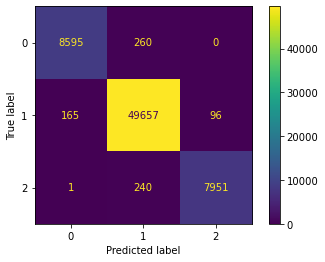

In [20]:
filename = 'LGBMclassifier__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)

Cat Boost Classifier

In [23]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(n_estimators=3000,max_depth=13, task_type="GPU",devices='0:1')
cb = cb.fit(X_train, y_train)
print(cb.score(X_test, y_test))

filename = 'CatBoostClassifier__.sav'
pickle.dump(cb, open(filename, 'wb'))

Learning rate set to 0.095935
0:	learn: 0.9892707	total: 153ms	remaining: 7m 38s
1:	learn: 0.9040850	total: 291ms	remaining: 7m 15s
2:	learn: 0.8364847	total: 427ms	remaining: 7m 6s
3:	learn: 0.7798924	total: 566ms	remaining: 7m 4s
4:	learn: 0.7308321	total: 708ms	remaining: 7m 3s
5:	learn: 0.6895773	total: 858ms	remaining: 7m 7s
6:	learn: 0.6550390	total: 995ms	remaining: 7m 5s
7:	learn: 0.6232085	total: 1.18s	remaining: 7m 22s
8:	learn: 0.5936527	total: 1.33s	remaining: 7m 22s
9:	learn: 0.5671077	total: 1.48s	remaining: 7m 21s
10:	learn: 0.5456937	total: 1.62s	remaining: 7m 20s
11:	learn: 0.5224363	total: 1.76s	remaining: 7m 19s
12:	learn: 0.5036388	total: 1.9s	remaining: 7m 17s
13:	learn: 0.4850531	total: 2.05s	remaining: 7m 16s
14:	learn: 0.4688557	total: 2.19s	remaining: 7m 16s
15:	learn: 0.4527471	total: 2.34s	remaining: 7m 16s
16:	learn: 0.4381917	total: 2.48s	remaining: 7m 16s
17:	learn: 0.4253641	total: 2.64s	remaining: 7m 16s
18:	learn: 0.4134803	total: 2.79s	remaining: 7m 17

159:	learn: 0.1285221	total: 23.5s	remaining: 6m 57s
160:	learn: 0.1279987	total: 23.7s	remaining: 6m 57s
161:	learn: 0.1275679	total: 23.8s	remaining: 6m 56s
162:	learn: 0.1271185	total: 23.9s	remaining: 6m 56s
163:	learn: 0.1266523	total: 24.1s	remaining: 6m 57s
164:	learn: 0.1262790	total: 24.3s	remaining: 6m 56s
165:	learn: 0.1257351	total: 24.4s	remaining: 6m 56s
166:	learn: 0.1252029	total: 24.5s	remaining: 6m 56s
167:	learn: 0.1246982	total: 24.7s	remaining: 6m 56s
168:	learn: 0.1241054	total: 24.8s	remaining: 6m 55s
169:	learn: 0.1235744	total: 25s	remaining: 6m 55s
170:	learn: 0.1230803	total: 25.1s	remaining: 6m 55s
171:	learn: 0.1225853	total: 25.3s	remaining: 6m 55s
172:	learn: 0.1221836	total: 25.4s	remaining: 6m 54s
173:	learn: 0.1217377	total: 25.5s	remaining: 6m 54s
174:	learn: 0.1213782	total: 25.7s	remaining: 6m 54s
175:	learn: 0.1209921	total: 25.8s	remaining: 6m 54s
176:	learn: 0.1206731	total: 25.9s	remaining: 6m 53s
177:	learn: 0.1202418	total: 26.1s	remaining: 6m

315:	learn: 0.0844978	total: 45.6s	remaining: 6m 27s
316:	learn: 0.0842972	total: 45.7s	remaining: 6m 26s
317:	learn: 0.0841752	total: 45.8s	remaining: 6m 26s
318:	learn: 0.0839675	total: 46s	remaining: 6m 26s
319:	learn: 0.0837835	total: 46.1s	remaining: 6m 26s
320:	learn: 0.0836383	total: 46.3s	remaining: 6m 26s
321:	learn: 0.0835045	total: 46.4s	remaining: 6m 25s
322:	learn: 0.0833592	total: 46.5s	remaining: 6m 25s
323:	learn: 0.0832101	total: 46.6s	remaining: 6m 25s
324:	learn: 0.0831194	total: 46.8s	remaining: 6m 25s
325:	learn: 0.0829961	total: 46.9s	remaining: 6m 24s
326:	learn: 0.0828412	total: 47.1s	remaining: 6m 24s
327:	learn: 0.0826726	total: 47.2s	remaining: 6m 24s
328:	learn: 0.0825240	total: 47.3s	remaining: 6m 24s
329:	learn: 0.0823290	total: 47.5s	remaining: 6m 24s
330:	learn: 0.0821170	total: 47.6s	remaining: 6m 24s
331:	learn: 0.0819510	total: 47.8s	remaining: 6m 24s
332:	learn: 0.0817679	total: 48s	remaining: 6m 24s
333:	learn: 0.0815874	total: 48.1s	remaining: 6m 2

473:	learn: 0.0670623	total: 1m 7s	remaining: 5m 57s
474:	learn: 0.0669567	total: 1m 7s	remaining: 5m 57s
475:	learn: 0.0668603	total: 1m 7s	remaining: 5m 57s
476:	learn: 0.0667606	total: 1m 7s	remaining: 5m 57s
477:	learn: 0.0666587	total: 1m 7s	remaining: 5m 57s
478:	learn: 0.0665768	total: 1m 7s	remaining: 5m 57s
479:	learn: 0.0665540	total: 1m 7s	remaining: 5m 56s
480:	learn: 0.0665066	total: 1m 8s	remaining: 5m 56s
481:	learn: 0.0664327	total: 1m 8s	remaining: 5m 56s
482:	learn: 0.0663598	total: 1m 8s	remaining: 5m 56s
483:	learn: 0.0663190	total: 1m 8s	remaining: 5m 56s
484:	learn: 0.0662366	total: 1m 8s	remaining: 5m 55s
485:	learn: 0.0661651	total: 1m 8s	remaining: 5m 55s
486:	learn: 0.0661099	total: 1m 8s	remaining: 5m 55s
487:	learn: 0.0660373	total: 1m 9s	remaining: 5m 55s
488:	learn: 0.0659486	total: 1m 9s	remaining: 5m 55s
489:	learn: 0.0658729	total: 1m 9s	remaining: 5m 55s
490:	learn: 0.0658289	total: 1m 9s	remaining: 5m 55s
491:	learn: 0.0657466	total: 1m 9s	remaining: 

627:	learn: 0.0581528	total: 1m 28s	remaining: 5m 33s
628:	learn: 0.0580952	total: 1m 28s	remaining: 5m 32s
629:	learn: 0.0580448	total: 1m 28s	remaining: 5m 32s
630:	learn: 0.0580084	total: 1m 28s	remaining: 5m 32s
631:	learn: 0.0579873	total: 1m 28s	remaining: 5m 32s
632:	learn: 0.0579298	total: 1m 28s	remaining: 5m 32s
633:	learn: 0.0578755	total: 1m 28s	remaining: 5m 32s
634:	learn: 0.0578412	total: 1m 29s	remaining: 5m 31s
635:	learn: 0.0578218	total: 1m 29s	remaining: 5m 31s
636:	learn: 0.0577732	total: 1m 29s	remaining: 5m 31s
637:	learn: 0.0577420	total: 1m 29s	remaining: 5m 31s
638:	learn: 0.0577141	total: 1m 29s	remaining: 5m 31s
639:	learn: 0.0576702	total: 1m 29s	remaining: 5m 31s
640:	learn: 0.0576138	total: 1m 29s	remaining: 5m 31s
641:	learn: 0.0575894	total: 1m 30s	remaining: 5m 30s
642:	learn: 0.0575373	total: 1m 30s	remaining: 5m 30s
643:	learn: 0.0574654	total: 1m 30s	remaining: 5m 30s
644:	learn: 0.0574119	total: 1m 30s	remaining: 5m 30s
645:	learn: 0.0573537	total:

779:	learn: 0.0525640	total: 1m 48s	remaining: 5m 9s
780:	learn: 0.0525246	total: 1m 48s	remaining: 5m 9s
781:	learn: 0.0524930	total: 1m 49s	remaining: 5m 9s
782:	learn: 0.0524621	total: 1m 49s	remaining: 5m 9s
783:	learn: 0.0524135	total: 1m 49s	remaining: 5m 8s
784:	learn: 0.0523705	total: 1m 49s	remaining: 5m 8s
785:	learn: 0.0523455	total: 1m 49s	remaining: 5m 8s
786:	learn: 0.0523128	total: 1m 49s	remaining: 5m 8s
787:	learn: 0.0522901	total: 1m 49s	remaining: 5m 8s
788:	learn: 0.0522680	total: 1m 49s	remaining: 5m 8s
789:	learn: 0.0522429	total: 1m 50s	remaining: 5m 7s
790:	learn: 0.0521767	total: 1m 50s	remaining: 5m 7s
791:	learn: 0.0521478	total: 1m 50s	remaining: 5m 7s
792:	learn: 0.0521090	total: 1m 50s	remaining: 5m 7s
793:	learn: 0.0520700	total: 1m 50s	remaining: 5m 7s
794:	learn: 0.0520470	total: 1m 50s	remaining: 5m 7s
795:	learn: 0.0520071	total: 1m 50s	remaining: 5m 7s
796:	learn: 0.0519704	total: 1m 51s	remaining: 5m 6s
797:	learn: 0.0519333	total: 1m 51s	remaining:

935:	learn: 0.0479955	total: 2m 10s	remaining: 4m 47s
936:	learn: 0.0479582	total: 2m 10s	remaining: 4m 47s
937:	learn: 0.0479256	total: 2m 10s	remaining: 4m 47s
938:	learn: 0.0479009	total: 2m 10s	remaining: 4m 47s
939:	learn: 0.0478822	total: 2m 11s	remaining: 4m 47s
940:	learn: 0.0478583	total: 2m 11s	remaining: 4m 46s
941:	learn: 0.0478332	total: 2m 11s	remaining: 4m 46s
942:	learn: 0.0478199	total: 2m 11s	remaining: 4m 46s
943:	learn: 0.0477997	total: 2m 11s	remaining: 4m 46s
944:	learn: 0.0477809	total: 2m 11s	remaining: 4m 46s
945:	learn: 0.0477577	total: 2m 11s	remaining: 4m 46s
946:	learn: 0.0477250	total: 2m 11s	remaining: 4m 46s
947:	learn: 0.0477018	total: 2m 12s	remaining: 4m 45s
948:	learn: 0.0476570	total: 2m 12s	remaining: 4m 45s
949:	learn: 0.0476373	total: 2m 12s	remaining: 4m 45s
950:	learn: 0.0476219	total: 2m 12s	remaining: 4m 45s
951:	learn: 0.0476013	total: 2m 12s	remaining: 4m 45s
952:	learn: 0.0475774	total: 2m 12s	remaining: 4m 45s
953:	learn: 0.0475592	total:

1086:	learn: 0.0444449	total: 2m 31s	remaining: 4m 27s
1087:	learn: 0.0444031	total: 2m 31s	remaining: 4m 26s
1088:	learn: 0.0443815	total: 2m 32s	remaining: 4m 26s
1089:	learn: 0.0443445	total: 2m 32s	remaining: 4m 26s
1090:	learn: 0.0443180	total: 2m 32s	remaining: 4m 26s
1091:	learn: 0.0443076	total: 2m 32s	remaining: 4m 26s
1092:	learn: 0.0442938	total: 2m 32s	remaining: 4m 26s
1093:	learn: 0.0442666	total: 2m 32s	remaining: 4m 26s
1094:	learn: 0.0442475	total: 2m 32s	remaining: 4m 25s
1095:	learn: 0.0442303	total: 2m 33s	remaining: 4m 25s
1096:	learn: 0.0441951	total: 2m 33s	remaining: 4m 25s
1097:	learn: 0.0441841	total: 2m 33s	remaining: 4m 25s
1098:	learn: 0.0441614	total: 2m 33s	remaining: 4m 25s
1099:	learn: 0.0441392	total: 2m 33s	remaining: 4m 25s
1100:	learn: 0.0441328	total: 2m 33s	remaining: 4m 25s
1101:	learn: 0.0441265	total: 2m 33s	remaining: 4m 25s
1102:	learn: 0.0440960	total: 2m 34s	remaining: 4m 24s
1103:	learn: 0.0440822	total: 2m 34s	remaining: 4m 24s
1104:	lear

1236:	learn: 0.0413072	total: 2m 52s	remaining: 4m 6s
1237:	learn: 0.0412913	total: 2m 52s	remaining: 4m 6s
1238:	learn: 0.0412742	total: 2m 53s	remaining: 4m 5s
1239:	learn: 0.0412512	total: 2m 53s	remaining: 4m 5s
1240:	learn: 0.0412336	total: 2m 53s	remaining: 4m 5s
1241:	learn: 0.0412248	total: 2m 53s	remaining: 4m 5s
1242:	learn: 0.0412133	total: 2m 53s	remaining: 4m 5s
1243:	learn: 0.0411893	total: 2m 53s	remaining: 4m 5s
1244:	learn: 0.0411792	total: 2m 53s	remaining: 4m 5s
1245:	learn: 0.0411562	total: 2m 54s	remaining: 4m 4s
1246:	learn: 0.0411371	total: 2m 54s	remaining: 4m 4s
1247:	learn: 0.0411086	total: 2m 54s	remaining: 4m 4s
1248:	learn: 0.0410841	total: 2m 54s	remaining: 4m 4s
1249:	learn: 0.0410648	total: 2m 54s	remaining: 4m 4s
1250:	learn: 0.0410344	total: 2m 54s	remaining: 4m 4s
1251:	learn: 0.0410129	total: 2m 54s	remaining: 4m 4s
1252:	learn: 0.0410058	total: 2m 54s	remaining: 4m 3s
1253:	learn: 0.0409900	total: 2m 55s	remaining: 4m 3s
1254:	learn: 0.0409574	total

1388:	learn: 0.0386165	total: 3m 13s	remaining: 3m 44s
1389:	learn: 0.0386126	total: 3m 13s	remaining: 3m 44s
1390:	learn: 0.0386034	total: 3m 14s	remaining: 3m 44s
1391:	learn: 0.0385935	total: 3m 14s	remaining: 3m 44s
1392:	learn: 0.0385865	total: 3m 14s	remaining: 3m 44s
1393:	learn: 0.0385715	total: 3m 14s	remaining: 3m 44s
1394:	learn: 0.0385608	total: 3m 14s	remaining: 3m 43s
1395:	learn: 0.0385496	total: 3m 14s	remaining: 3m 43s
1396:	learn: 0.0385339	total: 3m 14s	remaining: 3m 43s
1397:	learn: 0.0385133	total: 3m 15s	remaining: 3m 43s
1398:	learn: 0.0384955	total: 3m 15s	remaining: 3m 43s
1399:	learn: 0.0384798	total: 3m 15s	remaining: 3m 43s
1400:	learn: 0.0384628	total: 3m 15s	remaining: 3m 43s
1401:	learn: 0.0384377	total: 3m 15s	remaining: 3m 43s
1402:	learn: 0.0384260	total: 3m 15s	remaining: 3m 42s
1403:	learn: 0.0384172	total: 3m 15s	remaining: 3m 42s
1404:	learn: 0.0383998	total: 3m 16s	remaining: 3m 42s
1405:	learn: 0.0383905	total: 3m 16s	remaining: 3m 42s
1406:	lear

1538:	learn: 0.0363452	total: 3m 35s	remaining: 3m 24s
1539:	learn: 0.0363346	total: 3m 35s	remaining: 3m 24s
1540:	learn: 0.0363107	total: 3m 35s	remaining: 3m 23s
1541:	learn: 0.0363010	total: 3m 35s	remaining: 3m 23s
1542:	learn: 0.0362961	total: 3m 35s	remaining: 3m 23s
1543:	learn: 0.0362840	total: 3m 35s	remaining: 3m 23s
1544:	learn: 0.0362741	total: 3m 35s	remaining: 3m 23s
1545:	learn: 0.0362639	total: 3m 36s	remaining: 3m 23s
1546:	learn: 0.0362537	total: 3m 36s	remaining: 3m 23s
1547:	learn: 0.0362431	total: 3m 36s	remaining: 3m 22s
1548:	learn: 0.0362263	total: 3m 36s	remaining: 3m 22s
1549:	learn: 0.0362059	total: 3m 36s	remaining: 3m 22s
1550:	learn: 0.0361941	total: 3m 36s	remaining: 3m 22s
1551:	learn: 0.0361840	total: 3m 36s	remaining: 3m 22s
1552:	learn: 0.0361714	total: 3m 37s	remaining: 3m 22s
1553:	learn: 0.0361651	total: 3m 37s	remaining: 3m 22s
1554:	learn: 0.0361572	total: 3m 37s	remaining: 3m 21s
1555:	learn: 0.0361391	total: 3m 37s	remaining: 3m 21s
1556:	lear

1688:	learn: 0.0343676	total: 3m 56s	remaining: 3m 3s
1689:	learn: 0.0343528	total: 3m 56s	remaining: 3m 3s
1690:	learn: 0.0343368	total: 3m 56s	remaining: 3m 3s
1691:	learn: 0.0343307	total: 3m 56s	remaining: 3m 3s
1692:	learn: 0.0343119	total: 3m 57s	remaining: 3m 3s
1693:	learn: 0.0343023	total: 3m 57s	remaining: 3m 2s
1694:	learn: 0.0342899	total: 3m 57s	remaining: 3m 2s
1695:	learn: 0.0342779	total: 3m 57s	remaining: 3m 2s
1696:	learn: 0.0342660	total: 3m 57s	remaining: 3m 2s
1697:	learn: 0.0342535	total: 3m 57s	remaining: 3m 2s
1698:	learn: 0.0342422	total: 3m 57s	remaining: 3m 2s
1699:	learn: 0.0342333	total: 3m 58s	remaining: 3m 2s
1700:	learn: 0.0342235	total: 3m 58s	remaining: 3m 1s
1701:	learn: 0.0342115	total: 3m 58s	remaining: 3m 1s
1702:	learn: 0.0342014	total: 3m 58s	remaining: 3m 1s
1703:	learn: 0.0341839	total: 3m 58s	remaining: 3m 1s
1704:	learn: 0.0341748	total: 3m 58s	remaining: 3m 1s
1705:	learn: 0.0341627	total: 3m 58s	remaining: 3m 1s
1706:	learn: 0.0341441	total

1840:	learn: 0.0325295	total: 4m 18s	remaining: 2m 42s
1841:	learn: 0.0325151	total: 4m 18s	remaining: 2m 42s
1842:	learn: 0.0325053	total: 4m 18s	remaining: 2m 42s
1843:	learn: 0.0324920	total: 4m 18s	remaining: 2m 42s
1844:	learn: 0.0324840	total: 4m 18s	remaining: 2m 41s
1845:	learn: 0.0324704	total: 4m 18s	remaining: 2m 41s
1846:	learn: 0.0324610	total: 4m 19s	remaining: 2m 41s
1847:	learn: 0.0324513	total: 4m 19s	remaining: 2m 41s
1848:	learn: 0.0324328	total: 4m 19s	remaining: 2m 41s
1849:	learn: 0.0324203	total: 4m 19s	remaining: 2m 41s
1850:	learn: 0.0324087	total: 4m 19s	remaining: 2m 41s
1851:	learn: 0.0324006	total: 4m 19s	remaining: 2m 40s
1852:	learn: 0.0323914	total: 4m 19s	remaining: 2m 40s
1853:	learn: 0.0323836	total: 4m 19s	remaining: 2m 40s
1854:	learn: 0.0323725	total: 4m 20s	remaining: 2m 40s
1855:	learn: 0.0323590	total: 4m 20s	remaining: 2m 40s
1856:	learn: 0.0323528	total: 4m 20s	remaining: 2m 40s
1857:	learn: 0.0323360	total: 4m 20s	remaining: 2m 40s
1858:	lear

1990:	learn: 0.0308880	total: 4m 39s	remaining: 2m 21s
1991:	learn: 0.0308832	total: 4m 39s	remaining: 2m 21s
1992:	learn: 0.0308723	total: 4m 39s	remaining: 2m 21s
1993:	learn: 0.0308606	total: 4m 39s	remaining: 2m 21s
1994:	learn: 0.0308489	total: 4m 39s	remaining: 2m 21s
1995:	learn: 0.0308370	total: 4m 40s	remaining: 2m 20s
1996:	learn: 0.0308289	total: 4m 40s	remaining: 2m 20s
1997:	learn: 0.0308162	total: 4m 40s	remaining: 2m 20s
1998:	learn: 0.0308051	total: 4m 40s	remaining: 2m 20s
1999:	learn: 0.0307920	total: 4m 40s	remaining: 2m 20s
2000:	learn: 0.0307824	total: 4m 40s	remaining: 2m 20s
2001:	learn: 0.0307720	total: 4m 40s	remaining: 2m 20s
2002:	learn: 0.0307640	total: 4m 41s	remaining: 2m 19s
2003:	learn: 0.0307515	total: 4m 41s	remaining: 2m 19s
2004:	learn: 0.0307408	total: 4m 41s	remaining: 2m 19s
2005:	learn: 0.0307322	total: 4m 41s	remaining: 2m 19s
2006:	learn: 0.0307196	total: 4m 41s	remaining: 2m 19s
2007:	learn: 0.0307112	total: 4m 41s	remaining: 2m 19s
2008:	lear

2142:	learn: 0.0293140	total: 5m 1s	remaining: 2m
2143:	learn: 0.0293089	total: 5m 1s	remaining: 2m
2144:	learn: 0.0293015	total: 5m 1s	remaining: 2m
2145:	learn: 0.0292970	total: 5m 1s	remaining: 1m 59s
2146:	learn: 0.0292909	total: 5m 1s	remaining: 1m 59s
2147:	learn: 0.0292833	total: 5m 1s	remaining: 1m 59s
2148:	learn: 0.0292754	total: 5m 1s	remaining: 1m 59s
2149:	learn: 0.0292638	total: 5m 2s	remaining: 1m 59s
2150:	learn: 0.0292519	total: 5m 2s	remaining: 1m 59s
2151:	learn: 0.0292418	total: 5m 2s	remaining: 1m 59s
2152:	learn: 0.0292396	total: 5m 2s	remaining: 1m 58s
2153:	learn: 0.0292295	total: 5m 2s	remaining: 1m 58s
2154:	learn: 0.0292227	total: 5m 2s	remaining: 1m 58s
2155:	learn: 0.0292120	total: 5m 2s	remaining: 1m 58s
2156:	learn: 0.0292031	total: 5m 3s	remaining: 1m 58s
2157:	learn: 0.0291911	total: 5m 3s	remaining: 1m 58s
2158:	learn: 0.0291751	total: 5m 3s	remaining: 1m 58s
2159:	learn: 0.0291556	total: 5m 3s	remaining: 1m 58s
2160:	learn: 0.0291471	total: 5m 3s	rema

2294:	learn: 0.0279356	total: 5m 22s	remaining: 1m 39s
2295:	learn: 0.0279275	total: 5m 22s	remaining: 1m 38s
2296:	learn: 0.0279170	total: 5m 22s	remaining: 1m 38s
2297:	learn: 0.0279033	total: 5m 22s	remaining: 1m 38s
2298:	learn: 0.0278899	total: 5m 22s	remaining: 1m 38s
2299:	learn: 0.0278831	total: 5m 23s	remaining: 1m 38s
2300:	learn: 0.0278748	total: 5m 23s	remaining: 1m 38s
2301:	learn: 0.0278679	total: 5m 23s	remaining: 1m 38s
2302:	learn: 0.0278592	total: 5m 23s	remaining: 1m 37s
2303:	learn: 0.0278497	total: 5m 23s	remaining: 1m 37s
2304:	learn: 0.0278405	total: 5m 23s	remaining: 1m 37s
2305:	learn: 0.0278306	total: 5m 23s	remaining: 1m 37s
2306:	learn: 0.0278246	total: 5m 24s	remaining: 1m 37s
2307:	learn: 0.0278137	total: 5m 24s	remaining: 1m 37s
2308:	learn: 0.0278043	total: 5m 24s	remaining: 1m 37s
2309:	learn: 0.0277929	total: 5m 24s	remaining: 1m 36s
2310:	learn: 0.0277868	total: 5m 24s	remaining: 1m 36s
2311:	learn: 0.0277813	total: 5m 24s	remaining: 1m 36s
2312:	lear

2444:	learn: 0.0267301	total: 5m 43s	remaining: 1m 18s
2445:	learn: 0.0267199	total: 5m 43s	remaining: 1m 17s
2446:	learn: 0.0267072	total: 5m 43s	remaining: 1m 17s
2447:	learn: 0.0267015	total: 5m 44s	remaining: 1m 17s
2448:	learn: 0.0266952	total: 5m 44s	remaining: 1m 17s
2449:	learn: 0.0266875	total: 5m 44s	remaining: 1m 17s
2450:	learn: 0.0266817	total: 5m 44s	remaining: 1m 17s
2451:	learn: 0.0266694	total: 5m 44s	remaining: 1m 17s
2452:	learn: 0.0266652	total: 5m 44s	remaining: 1m 16s
2453:	learn: 0.0266558	total: 5m 44s	remaining: 1m 16s
2454:	learn: 0.0266502	total: 5m 45s	remaining: 1m 16s
2455:	learn: 0.0266461	total: 5m 45s	remaining: 1m 16s
2456:	learn: 0.0266388	total: 5m 45s	remaining: 1m 16s
2457:	learn: 0.0266314	total: 5m 45s	remaining: 1m 16s
2458:	learn: 0.0266235	total: 5m 45s	remaining: 1m 16s
2459:	learn: 0.0266161	total: 5m 45s	remaining: 1m 15s
2460:	learn: 0.0266114	total: 5m 45s	remaining: 1m 15s
2461:	learn: 0.0266028	total: 5m 46s	remaining: 1m 15s
2462:	lear

2598:	learn: 0.0255812	total: 6m 5s	remaining: 56.5s
2599:	learn: 0.0255744	total: 6m 6s	remaining: 56.3s
2600:	learn: 0.0255669	total: 6m 6s	remaining: 56.2s
2601:	learn: 0.0255616	total: 6m 6s	remaining: 56s
2602:	learn: 0.0255563	total: 6m 6s	remaining: 55.9s
2603:	learn: 0.0255482	total: 6m 6s	remaining: 55.8s
2604:	learn: 0.0255379	total: 6m 6s	remaining: 55.6s
2605:	learn: 0.0255364	total: 6m 6s	remaining: 55.5s
2606:	learn: 0.0255310	total: 6m 7s	remaining: 55.3s
2607:	learn: 0.0255245	total: 6m 7s	remaining: 55.2s
2608:	learn: 0.0255175	total: 6m 7s	remaining: 55.1s
2609:	learn: 0.0255131	total: 6m 7s	remaining: 54.9s
2610:	learn: 0.0255049	total: 6m 7s	remaining: 54.8s
2611:	learn: 0.0255026	total: 6m 7s	remaining: 54.6s
2612:	learn: 0.0254965	total: 6m 7s	remaining: 54.5s
2613:	learn: 0.0254909	total: 6m 8s	remaining: 54.3s
2614:	learn: 0.0254835	total: 6m 8s	remaining: 54.2s
2615:	learn: 0.0254772	total: 6m 8s	remaining: 54.1s
2616:	learn: 0.0254702	total: 6m 8s	remaining: 5

2752:	learn: 0.0244708	total: 6m 27s	remaining: 34.8s
2753:	learn: 0.0244660	total: 6m 28s	remaining: 34.7s
2754:	learn: 0.0244579	total: 6m 28s	remaining: 34.5s
2755:	learn: 0.0244535	total: 6m 28s	remaining: 34.4s
2756:	learn: 0.0244424	total: 6m 28s	remaining: 34.2s
2757:	learn: 0.0244326	total: 6m 28s	remaining: 34.1s
2758:	learn: 0.0244219	total: 6m 28s	remaining: 34s
2759:	learn: 0.0244170	total: 6m 29s	remaining: 33.8s
2760:	learn: 0.0244098	total: 6m 29s	remaining: 33.7s
2761:	learn: 0.0243991	total: 6m 29s	remaining: 33.5s
2762:	learn: 0.0243957	total: 6m 29s	remaining: 33.4s
2763:	learn: 0.0243879	total: 6m 29s	remaining: 33.3s
2764:	learn: 0.0243832	total: 6m 29s	remaining: 33.1s
2765:	learn: 0.0243777	total: 6m 29s	remaining: 33s
2766:	learn: 0.0243752	total: 6m 30s	remaining: 32.8s
2767:	learn: 0.0243720	total: 6m 30s	remaining: 32.7s
2768:	learn: 0.0243607	total: 6m 30s	remaining: 32.6s
2769:	learn: 0.0243569	total: 6m 30s	remaining: 32.4s
2770:	learn: 0.0243475	total: 6m

2906:	learn: 0.0234367	total: 6m 50s	remaining: 13.1s
2907:	learn: 0.0234289	total: 6m 50s	remaining: 13s
2908:	learn: 0.0234222	total: 6m 50s	remaining: 12.8s
2909:	learn: 0.0234151	total: 6m 50s	remaining: 12.7s
2910:	learn: 0.0234108	total: 6m 50s	remaining: 12.6s
2911:	learn: 0.0234058	total: 6m 50s	remaining: 12.4s
2912:	learn: 0.0233996	total: 6m 51s	remaining: 12.3s
2913:	learn: 0.0233909	total: 6m 51s	remaining: 12.1s
2914:	learn: 0.0233853	total: 6m 51s	remaining: 12s
2915:	learn: 0.0233818	total: 6m 51s	remaining: 11.9s
2916:	learn: 0.0233768	total: 6m 51s	remaining: 11.7s
2917:	learn: 0.0233729	total: 6m 51s	remaining: 11.6s
2918:	learn: 0.0233645	total: 6m 51s	remaining: 11.4s
2919:	learn: 0.0233592	total: 6m 52s	remaining: 11.3s
2920:	learn: 0.0233547	total: 6m 52s	remaining: 11.2s
2921:	learn: 0.0233510	total: 6m 52s	remaining: 11s
2922:	learn: 0.0233422	total: 6m 52s	remaining: 10.9s
2923:	learn: 0.0233352	total: 6m 52s	remaining: 10.7s
2924:	learn: 0.0233311	total: 6m 5

accuracy :  0.9911296946165907
              precision    recall  f1-score   support

           0     0.9726    0.9813    0.9769      8855
           1     0.9939    0.9942    0.9941     49918
           2     0.9943    0.9830    0.9886      8192

    accuracy                         0.9911     66965
   macro avg     0.9869    0.9862    0.9865     66965
weighted avg     0.9912    0.9911    0.9911     66965



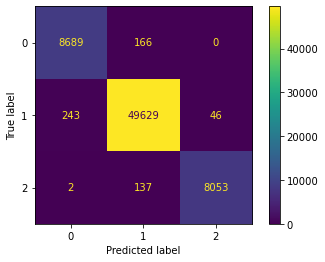

In [21]:
filename = 'CatBoostClassifier__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)

SVM

accuracy :  0.9985216157694318
              precision    recall  f1-score   support

           0     0.9965    0.9967    0.9966      8855
           1     0.9987    0.9993    0.9990     49918
           2     0.9996    0.9956    0.9976      8192

    accuracy                         0.9985     66965
   macro avg     0.9983    0.9972    0.9977     66965
weighted avg     0.9985    0.9985    0.9985     66965



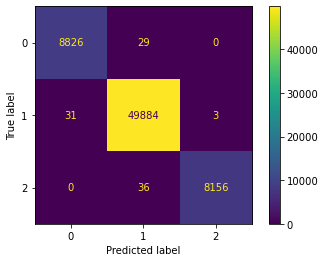

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer='char') #vectorizing
X = count_vectorizer.fit_transform(df['password'].values.astype('U'))
X_train, X_test, y_train, y_test = train_test_split(X, df['strength'], test_size=0.10, random_state=42)



#from sklearn.svm import SVC
#clf = SVC(verbose=3,kernel='rbf')
#clf = clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))

#filename = 'SVMfullCv__.sav'
#pickle.dump(clf, open(filename, 'wb'))

filename = 'SVMfullCv__.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
r = classification_report(y_test, y_pred,digits=4)
print("accuracy : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(loaded_model,X_test,y_test, values_format='')
print(r)